## Dimensionality Reduction

### Unsupervised Dimensionality Reduction with PCA

In [5]:
import pandas as pd

df = pd.read_csv('./data/wine.data', header=None)
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
from sklearn.model_selection import train_test_split

X,y = df.iloc[:,1:].values, df.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   stratify=y,
                                                   random_state=1)

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
# helper function
from matplotlib.colors import ListedColormap
import numpy as np
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

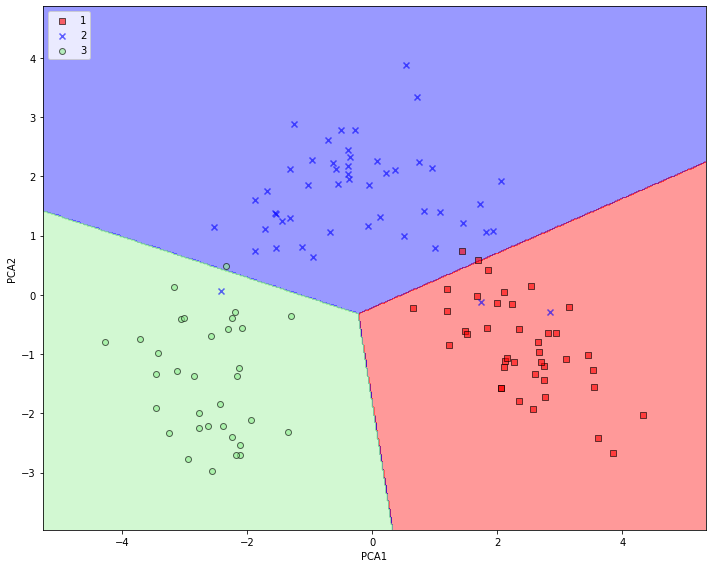

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

lr = LogisticRegression(multi_class='ovr',
                        solver='lbfgs',
                        random_state=1)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

plt.figure(figsize=(10,8))
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='upper left')
plt.tight_layout()

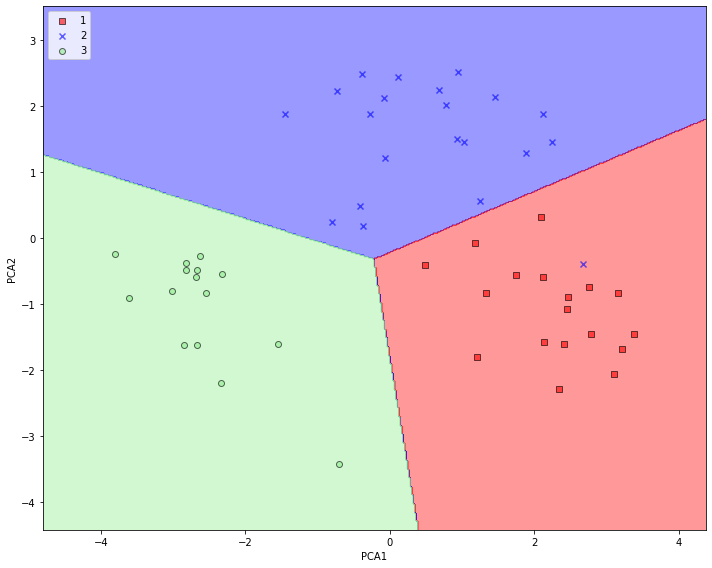

In [17]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='upper left')
plt.tight_layout()

### Supervised Dimensionality Reduction via LDA

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

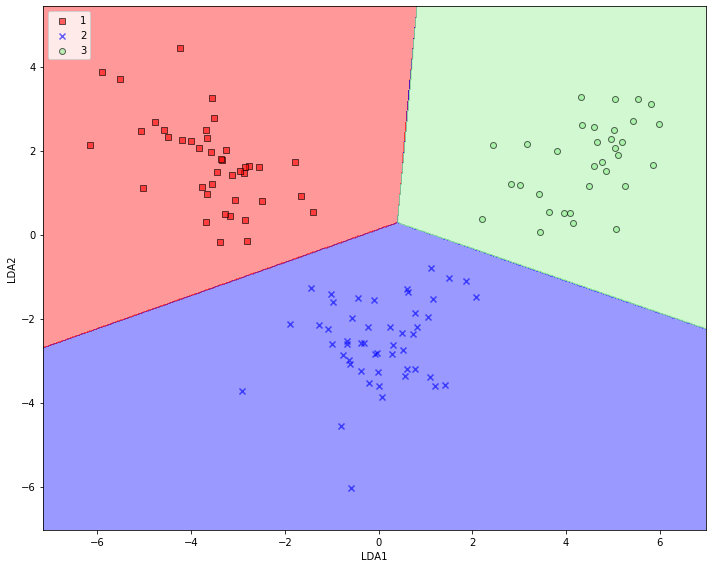

In [20]:
lr = LogisticRegression(multi_class='ovr',
                        solver='lbfgs',
                        random_state=1)

lr = lr.fit(X_train_lda, y_train)
plt.figure(figsize=(10,8))
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend(loc='upper left')
plt.tight_layout()

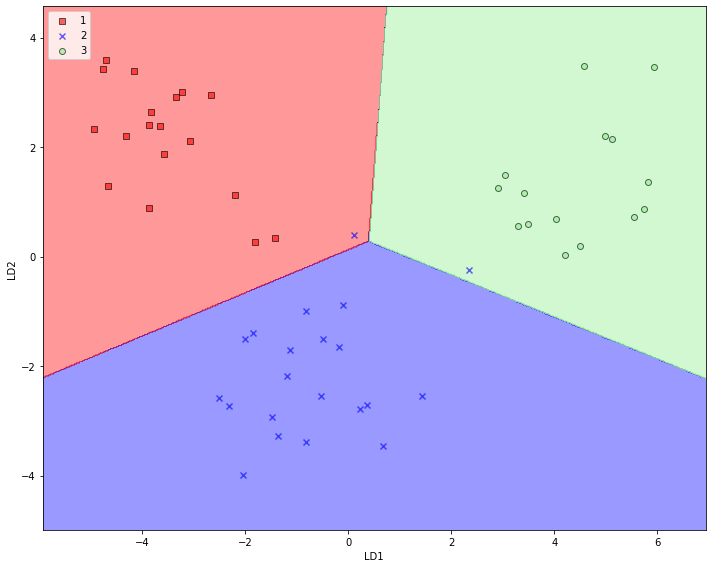

In [21]:
X_test_lda = lda.transform(X_test_std)
plt.figure(figsize=(10,8))
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='upper left')
plt.tight_layout()

### KPCA for Nonlinear Mapping

In [22]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, random_state=123)

In [23]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, gamma= 15, kernel='rbf')

X_kpca = kpca.fit_transform(X)

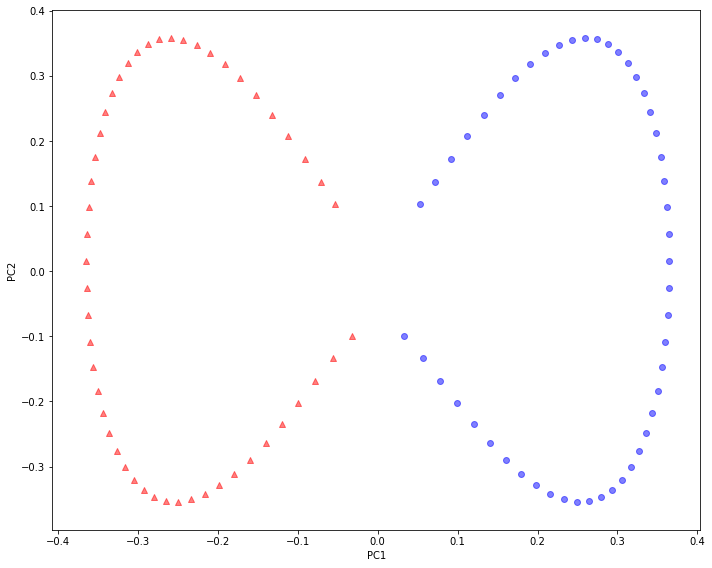

In [26]:
plt.figure(figsize=(10,8))
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],color='red', marker='^', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()